(20, 10)


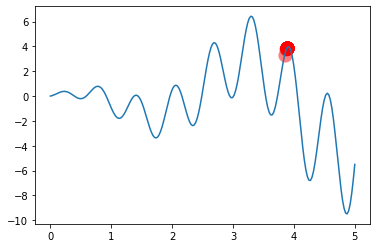

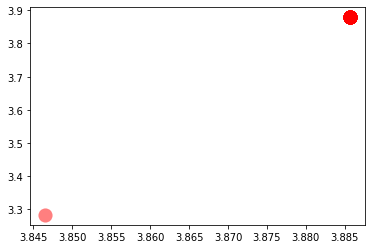

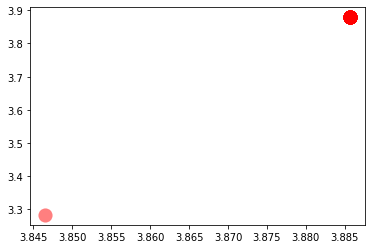

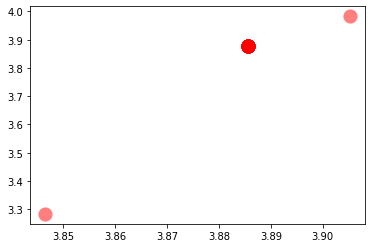

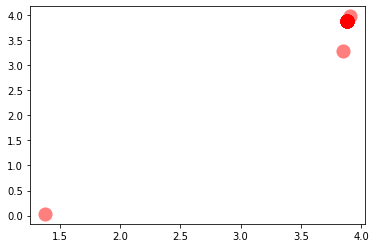

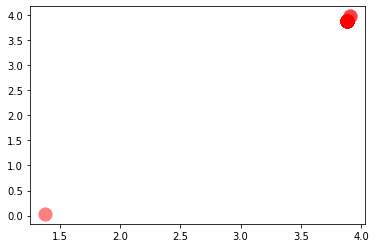

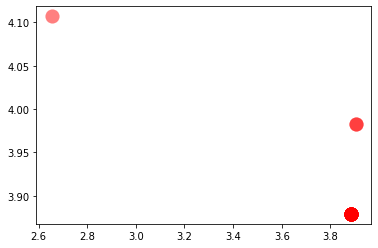

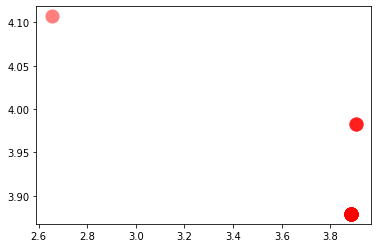

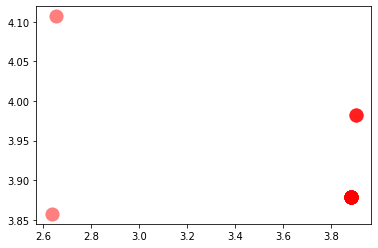

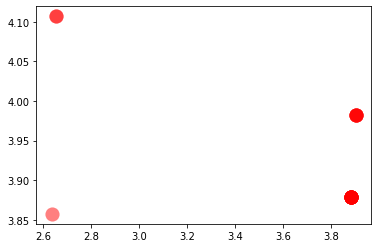

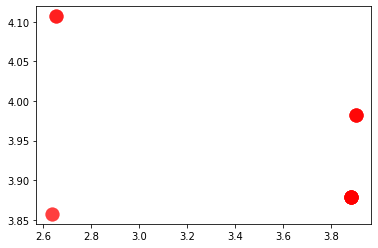

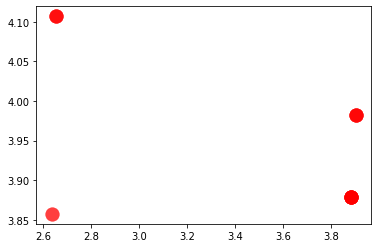

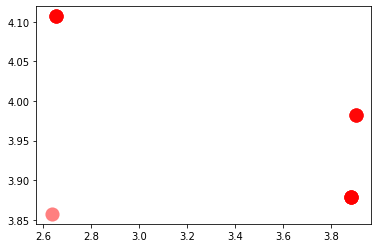

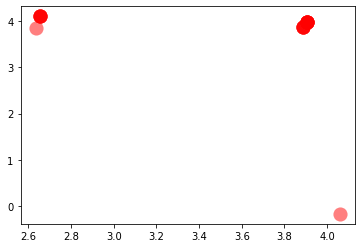

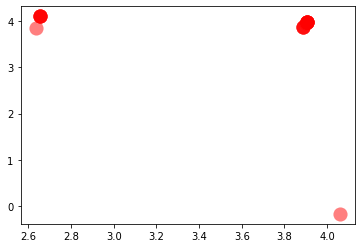

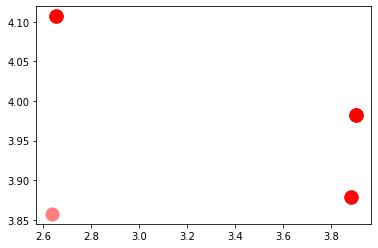

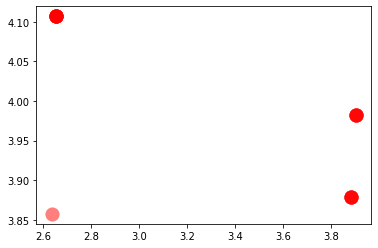

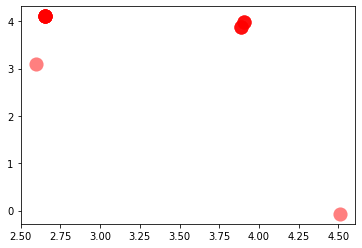

KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

DNA_SIZE = 10            # DNA length
POP_SIZE = 20            # population size
CROSS_RATE = 0.6         # mating probability (DNA crossover)
MUTATION_RATE = 0.01     # mutation probability
N_GENERATIONS = 200
X_BOUND = [0, 5]         # x upper and lower bounds


def F(x): return np.sin(10*x)*x + np.cos(2*x)*x     # to find the maximum of this function


class MGA(object):
    def __init__(self, DNA_size, DNA_bound, cross_rate, mutation_rate, pop_size):
        self.DNA_size = DNA_size
        DNA_bound[1] += 1
        self.DNA_bound = DNA_bound
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size

        # initial DNAs for winner and loser
        self.pop = np.random.randint(*DNA_bound, size=(1, self.DNA_size)).repeat(pop_size, axis=0)
        print(self.pop.shape)

    def translateDNA(self, pop):
        # convert binary DNA to decimal and normalize it to a range(0, 5)
        return pop.dot(2 ** np.arange(self.DNA_size)[::-1]) / float(2 ** self.DNA_size - 1) * X_BOUND[1]

    def get_fitness(self, product):
        return product      # it is OK to use product value as fitness in here

    def crossover(self, loser_winner):      # crossover for loser
        cross_idx = np.empty((self.DNA_size,)).astype(np.bool)
        for i in range(self.DNA_size):
            cross_idx[i] = True if np.random.rand() < self.cross_rate else False  # crossover index
        loser_winner[0, cross_idx] = loser_winner[1, cross_idx]  # assign winners genes to loser
        return loser_winner

    def mutate(self, loser_winner):         # mutation for loser
        mutation_idx = np.empty((self.DNA_size,)).astype(np.bool)
        for i in range(self.DNA_size):
            mutation_idx[i] = True if np.random.rand() < self.mutate_rate else False  # mutation index
        # flip values in mutation points
        loser_winner[0, mutation_idx] = ~loser_winner[0, mutation_idx].astype(np.bool)
        return loser_winner

    def evolve(self, n):    # nature selection wrt pop's fitness
        for _ in range(n):  # random pick and compare n times
            sub_pop_idx = np.random.choice(np.arange(0, self.pop_size), size=2, replace=False)
            sub_pop = self.pop[sub_pop_idx]             # pick 2 from pop
            product = F(self.translateDNA(sub_pop))
            fitness = self.get_fitness(product)
            loser_winner_idx = np.argsort(fitness)
            loser_winner = sub_pop[loser_winner_idx]    # the first is loser and second is winner
            loser_winner = self.crossover(loser_winner)
            loser_winner = self.mutate(loser_winner)
            self.pop[sub_pop_idx] = loser_winner

        DNA_prod = self.translateDNA(self.pop)
        pred = F(DNA_prod)
        return DNA_prod, pred


plt.ion()       # something about plotting
x = np.linspace(*X_BOUND, 200)
plt.plot(x, F(x))

ga = MGA(DNA_size=DNA_SIZE, DNA_bound=[0, 1], cross_rate=CROSS_RATE, mutation_rate=MUTATION_RATE, pop_size=POP_SIZE)

for _ in range(N_GENERATIONS):                    # 100 generations
    DNA_prod, pred = ga.evolve(5)          # natural selection, crossover and mutation

    # something about plotting
    if 'sca' in globals(): sca.remove()
    sca = plt.scatter(DNA_prod, pred, s=200, lw=0, c='red', alpha=0.5); plt.pause(0.05)

plt.ioff();plt.show()